In [50]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [51]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [52]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [53]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [54]:
from torch.utils.data import DataLoader

loaders = {

    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

    'test' : DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

}

In [55]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x78ca593aaef0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x78ca593abeb0>}

In [56]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 2, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()

        # Adjusted the input size to the first fully connected layer
        self.fc1 = nn.Linear(2 * 4 * 4, 50)  # 2 channels, 4x4 feature maps
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 2 * 4 * 4)  # Flatten the output before the fully connected layer
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [59]:
import torch

device = torch.device('cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset) : .0f}%\n)")




In [60]:
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	2.292890
Train Epoch: 1 [2000/60000 (3%)]	2.283561
Train Epoch: 1 [4000/60000 (7%)]	2.226434
Train Epoch: 1 [6000/60000 (10%)]	2.009055
Train Epoch: 1 [8000/60000 (13%)]	1.933446
Train Epoch: 1 [10000/60000 (17%)]	1.676225
Train Epoch: 1 [12000/60000 (20%)]	1.689887
Train Epoch: 1 [14000/60000 (23%)]	1.344146
Train Epoch: 1 [16000/60000 (27%)]	1.395037
Train Epoch: 1 [18000/60000 (30%)]	1.343461
Train Epoch: 1 [20000/60000 (33%)]	1.565940
Train Epoch: 1 [22000/60000 (37%)]	1.159616
Train Epoch: 1 [24000/60000 (40%)]	1.279806
Train Epoch: 1 [26000/60000 (43%)]	1.329773
Train Epoch: 1 [28000/60000 (47%)]	1.524599
Train Epoch: 1 [30000/60000 (50%)]	1.198719
Train Epoch: 1 [32000/60000 (53%)]	1.037544
Train Epoch: 1 [34000/60000 (57%)]	1.339837
Train Epoch: 1 [36000/60000 (60%)]	1.381601
Train Epoch: 1 [38000/60000 (63%)]	1.306694
Train Epoch: 1 [40000/60000 (67%)]	1.226870
Train Epoch: 1 [42000/60000 (70%)]	1.293891
Train Epoch: 1 [44000/60000 (73%)]	0.985487

Prediction: 9


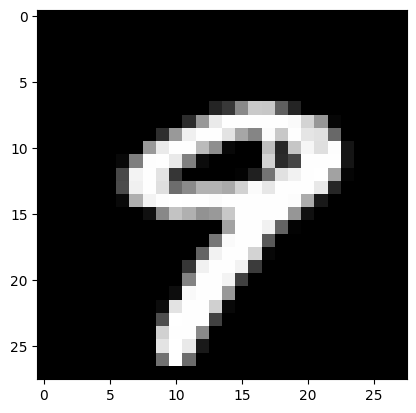

In [65]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[9]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show()